Pass or fail based on critieria 
final grade prediction for values that do not have a final grade 
a knn (idk which one yet)

In [ ]:
import pandas as pd
import dmba
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
student_performace = pd.read_csv('student_performance_updated_1000.csv')


In [ ]:
def dataCleaning(student_performace):
    student_performace.columns = [s.strip().replace(' ','_') for s in student_performace.columns]
    return student_performace[
    (student_performace['StudyHoursPerWeek'] > 0) &
    (student_performace['AttendanceRate'] <= 100) &
    ((student_performace['FinalGrade'] <= 100)|
    (student_performace['FinalGrade'].isna()))&
    (student_performace['Study_Hours']>=0)
    ]


In [ ]:
finalsGradePredictor = []
noData=student_performace['FinalGrade'].isna()
finalsGradePredictor = dataCleaning(student_performace[student_performace['FinalGrade'].isna()])
columns_to_check = finalsGradePredictor.columns.difference(['FinalGrade'])
finalsGradePredictor = finalsGradePredictor.dropna(subset=columns_to_check)
finalsGradePredictor

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study_Hours,Attendance_(%),Online_Classes_Taken
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
32,2604.0,Yolanda Chen,Male,82.0,15.0,85.0,3.0,High,NaN,2.4,63.0,False
85,8381.0,Peter Welch,Female,88.0,15.0,90.0,2.0,Low,NaN,3.5,79.0,True
120,4394.0,John Warner,Male,92.0,30.0,65.0,3.0,High,NaN,4.3,59.0,True
124,1996.0,Manuel Baker,Female,70.0,8.0,85.0,1.0,Low,NaN,0.4,55.0,False
141,6562.0,Amy Rodriguez,Male,95.0,10.0,85.0,2.0,Low,NaN,2.7,62.0,False
222,5703.0,Alexis Walton,Female,78.0,10.0,60.0,1.0,Medium,NaN,4.3,74.0,False
225,5516.0,Jean Moreno,Male,90.0,15.0,60.0,3.0,High,NaN,1.0,56.0,True
260,1440.0,Cassandra Snyder,Female,92.0,17.0,82.0,2.0,Medium,NaN,0.7,69.0,True
335,1020.0,Timothy Clements,Male,70.0,17.0,60.0,0.0,Medium,NaN,4.4,72.0,False


In [ ]:
#descriptive statistic
reduced_performace = student_performace.dropna()
reduced_performace = dataCleaning(reduced_performace)
x = reduced_performace.drop(columns=['FinalGrade'])
y = reduced_performace['FinalGrade']
reduced_performace.sample(5)


640

In [ ]:
reduced_performace.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%)
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,5415.310938,85.381250,17.689062,77.956250,1.534375,80.107812,2.484531,76.092187
std,2683.068868,7.293852,6.349636,10.065107,1.040076,9.629568,1.441112,14.706708
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,0.000000,50.000000
25%,3039.250000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5405.500000,86.500000,18.000000,82.000000,2.000000,80.000000,2.600000,76.000000
75%,7791.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9991.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,100.000000


## HeatMap

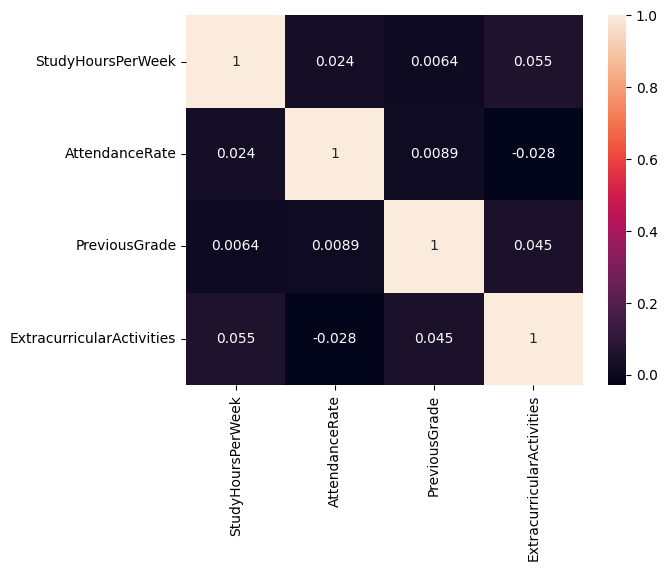

In [ ]:
heatMapvariables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','ExtracurricularActivities'
            ,'Online_Classes_Taken']
heatMapData = reduced_performace[heatMapvariables]
corr= heatMapData.corr(numeric_only=True)
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)
plt.show()

We want to predict the final grades of students based on the various supervised learning techniques we have done in class so far
these are 
knn
nn
linear regression 
regression trees
ensembles

## Linear Regression(multiple)

In [ ]:
variables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','ExtracurricularActivities',
            'ParentalSupport_Low','ParentalSupport_Medium','Gender_Male','Online_Classes_Taken_True']

In [ ]:
reduced_performace= pd.get_dummies(reduced_performace,drop_first=True,columns=['ParentalSupport','Gender','Online_Classes_Taken'])
reduced_performace

,StudentID,Name,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%),ParentalSupport_Low,ParentalSupport_Medium,Gender_Male,Online_Classes_Taken_True
0,1.0,John,85.0,15.0,78.0,1.0,80.0,4.8,59.0,False,False,True,False
1,2.0,Sarah,90.0,20.0,85.0,2.0,87.0,2.2,70.0,False,True,False,True
2,3.0,Alex,78.0,10.0,65.0,0.0,68.0,4.6,92.0,True,False,True,False
3,4.0,Michael,92.0,25.0,90.0,3.0,92.0,2.9,96.0,False,False,True,False
6,7.0,Daniel,70.0,8.0,60.0,0.0,62.0,4.5,96.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2116.0,Kimberly Pena,91.0,30.0,88.0,2.0,68.0,3.6,79.0,False,False,False,False
991,7701.0,Anna Martinez,85.0,30.0,70.0,3.0,90.0,0.4,76.0,False,True,True,False
993,3592.0,Monica Johnson,90.0,25.0,60.0,1.0,87.0,1.7,79.0,True,False,False,False
994,2787.0,Shannon Porter,78.0,20.0,60.0,0.0,62.0,1.6,70.0,False,False,True,False


In [ ]:
#define dependent and independent variables

X=reduced_performace[variables]
y=reduced_performace[['FinalGrade']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictedFinal = regr.predict(X_test)
r2_score_value = regr.score(X_test, y_test)
print(f"R-squared (R2) score: {r2_score_value}")

R-squared (R2) score: -0.026070046427051796


## Knn

In [ ]:
variables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','Attendance_(%)','ExtracurricularActivities','Study_Hours'
            ,'Online_Classes_Taken_True','Online_Classes_Taken_False','ParentalSupport_Low','ParentalSupport_Medium','ParentalSupport_High','Gender_Male','Gender_Female']

In [ ]:
reduced_performace = student_performace.dropna()
reduced_performace = dataCleaning(reduced_performace)
reduced_performace= pd.get_dummies(reduced_performace,drop_first=False,columns=['ParentalSupport','Gender','Online_Classes_Taken'])
X= reduced_performace[variables]
y = reduced_performace['FinalGrade']
reduced_performace

,StudentID,Name,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%),ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium,Gender_Female,Gender_Male,Online_Classes_Taken_False,Online_Classes_Taken_True
0,1.0,John,85.0,15.0,78.0,1.0,80.0,4.8,59.0,True,False,False,False,True,True,False
1,2.0,Sarah,90.0,20.0,85.0,2.0,87.0,2.2,70.0,False,False,True,True,False,False,True
2,3.0,Alex,78.0,10.0,65.0,0.0,68.0,4.6,92.0,False,True,False,False,True,True,False
3,4.0,Michael,92.0,25.0,90.0,3.0,92.0,2.9,96.0,True,False,False,False,True,True,False
6,7.0,Daniel,70.0,8.0,60.0,0.0,62.0,4.5,96.0,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2116.0,Kimberly Pena,91.0,30.0,88.0,2.0,68.0,3.6,79.0,True,False,False,True,False,True,False
991,7701.0,Anna Martinez,85.0,30.0,70.0,3.0,90.0,0.4,76.0,False,False,True,False,True,True,False
993,3592.0,Monica Johnson,90.0,25.0,60.0,1.0,87.0,1.7,79.0,False,True,False,True,False,True,False
994,2787.0,Shannon Porter,78.0,20.0,60.0,0.0,62.0,1.6,70.0,True,False,False,False,True,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train_scaled, y_train)

,n_neighbors,100
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = knn.predict(X_test_scaled)
print("KNN R2:", r2_score(y_test, y_pred))

KNN R2: -0.056871305753545265
